# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


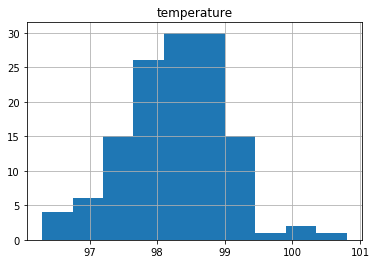

In [3]:
pd.DataFrame.hist(df, column='temperature');

3. Is the sample size large? Are the observations independent? No, and Yes:

In [5]:
print('We have', len(df), 'samples with', len(list(df.columns)), 'variables.')

We have 130 samples with 3 variables.


Is the true population mean really 98.6 degrees F? The mean of the sample is 98.25
Would you use a one-sample or two-sample test? Why? I would use a one-sample to compare a sample group to accepted mean.
In this situation, is it appropriate to use the  tt  or  zz  statistic? The t statistic is most appropriate.
Now try using the other test. How is the result be different? Why?

In [6]:
mean_temp = df['temperature'].mean()
print('Mean temperature of the sample is: {:.2f}'.format(mean_temp))

Mean temperature of the sample is: 98.25


In [7]:
one_sample = st.ttest_1samp(df['temperature'], popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)

The t-statistic is -5.455 and the p-value is 0.0000002411.


At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [8]:
lower, upper = st.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=st.sem(df['temperature']))

print('The confidence interval is ({:.2f}, {:.2f}).'.format(lower,upper))

The confidence interval is (98.12, 98.38).


4. At what temperature should we consider someone's temperature to be "abnormal"? Above 98.38 or below 98.12

Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [9]:
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

print('There are {} males in the sample and their mean temperature is {:.2f}'.format(len(male_df), 
                                                                                     male_df['temperature'].mean()))
print('There are {} females in the sample and their mean temperature is {:.2f}'.format(len(female_df), 
                                                                                       female_df['temperature'].mean()))

There are 65 males in the sample and their mean temperature is 98.10
There are 65 females in the sample and their mean temperature is 98.39


There is a difference, but it is small enough to not be statistically sifnificant or enough to require publishing different
"normal temperatures" for each sex.
